In [67]:
import os
from os import path
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd

if not 'BASE_DIR' in locals():
    BASE_DIR = os.path.abspath(os.curdir)

In [68]:
if os.path.abspath(os.curdir) == BASE_DIR:
    os.chdir('../')

dirname = os.path.abspath(os.curdir) + r'\data'
df = pd.read_csv(path.join(os.sep, dirname, 'Annual rainfall in Nottingham castle 1867  1939.csv'))
df = df['x']
df.head()

0    29.90
1    25.33
2    27.75
3    17.93
4    26.83
Name: x, dtype: float64

In [69]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt

Проверяем на стационарность

In [70]:
def Fuller(name:str, df:pd.DataFrame):
    alpha = 0.05
    if hasattr(df, 'columns'):
        df = df[df.columns[0]]
    print(f'Тест Дики-Фуллера ряда {name} :')
    # определяем результат значения теста из библиотеки с учетом
    dftest = adfuller(df, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

    if dfoutput["p-value"] < alpha:
        print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
    else:
        print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")
Fuller('Rainfall', df)

Тест Дики-Фуллера ряда Rainfall :
Test Statistic                 -3.383976
p-value                         0.011517
#Lags Used                      2.000000
Number of Observations Used    70.000000
Critical Value (1%)            -3.527426
Critical Value (5%)            -2.903811
Critical Value (10%)           -2.589320
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


Раскладываем на компоненты

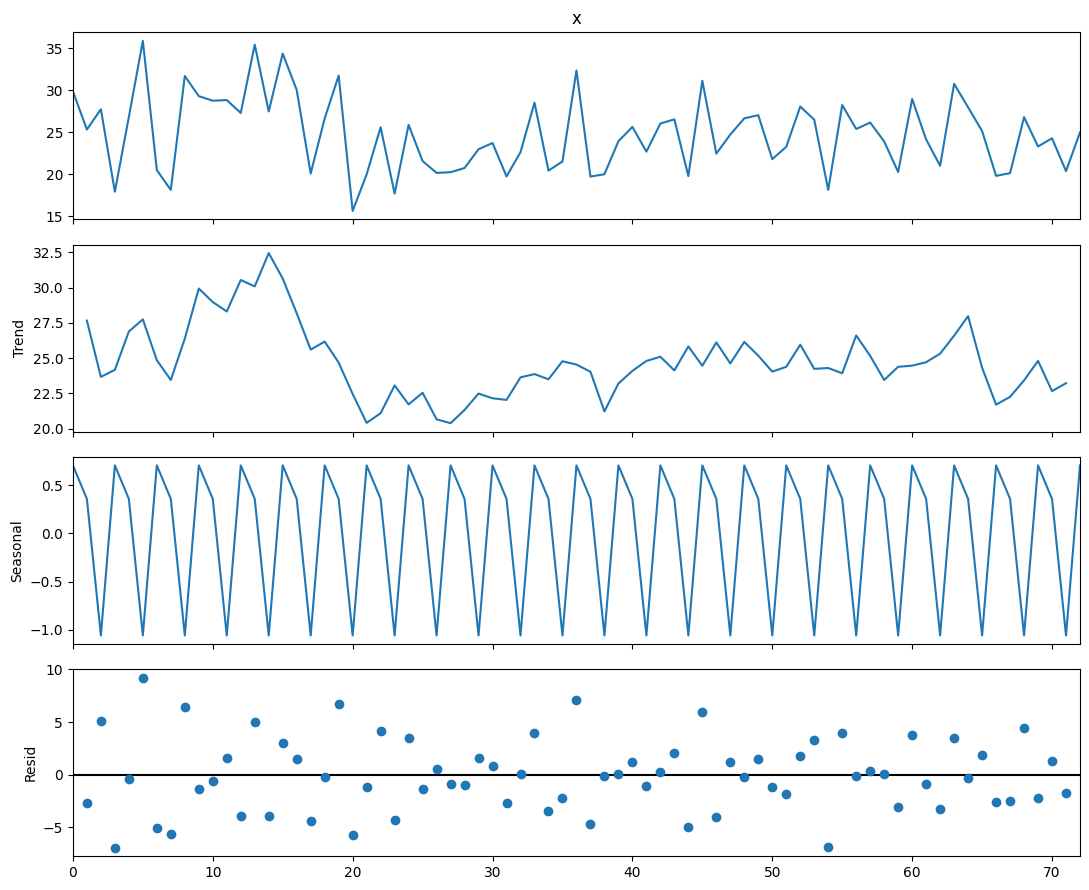

In [71]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
decompose_add = seasonal_decompose(df, model='additive', period=3)
decompose_add.plot()
plt.show()

Разбор на компоненты мультипликативного ряда

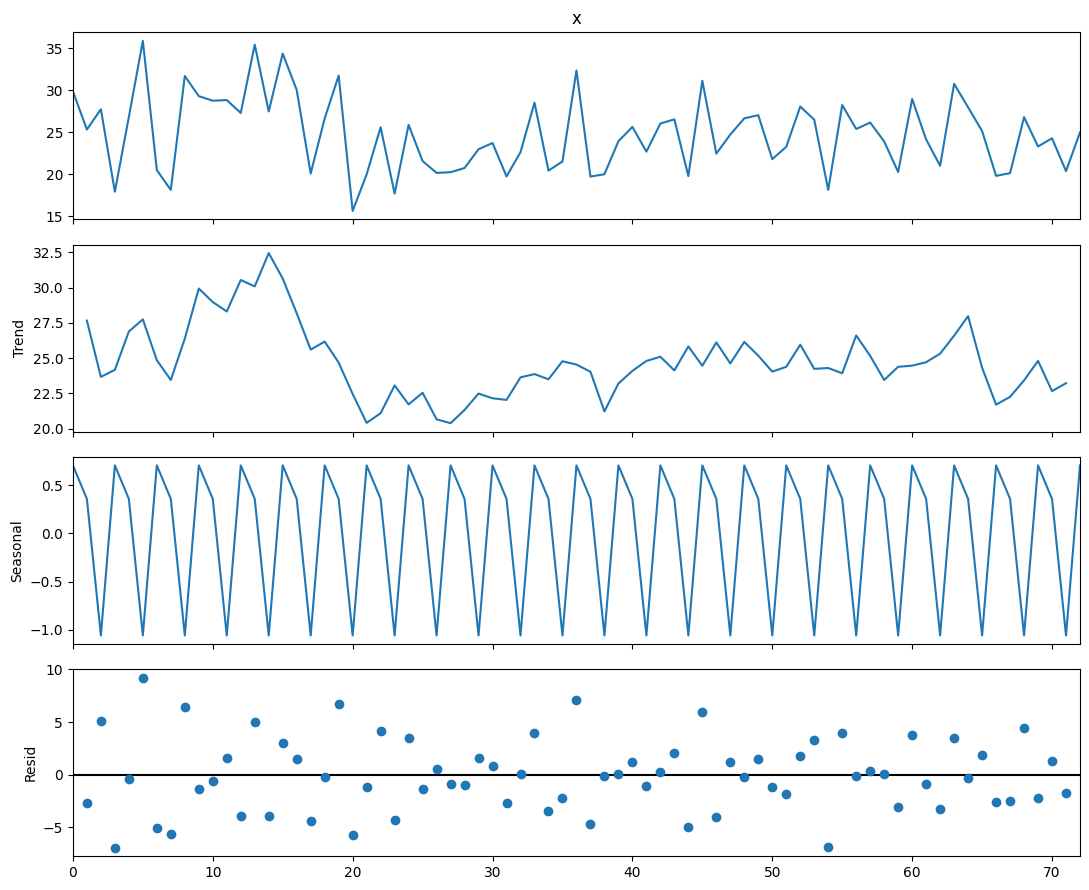

In [72]:
decompose_mult = seasonal_decompose(df, model='multiplicative', period=3)
decompose_add.plot()
plt.show()

Собранный аддитивный ряд

Text(0.5, 1.0, 'Аддитивный ряд')

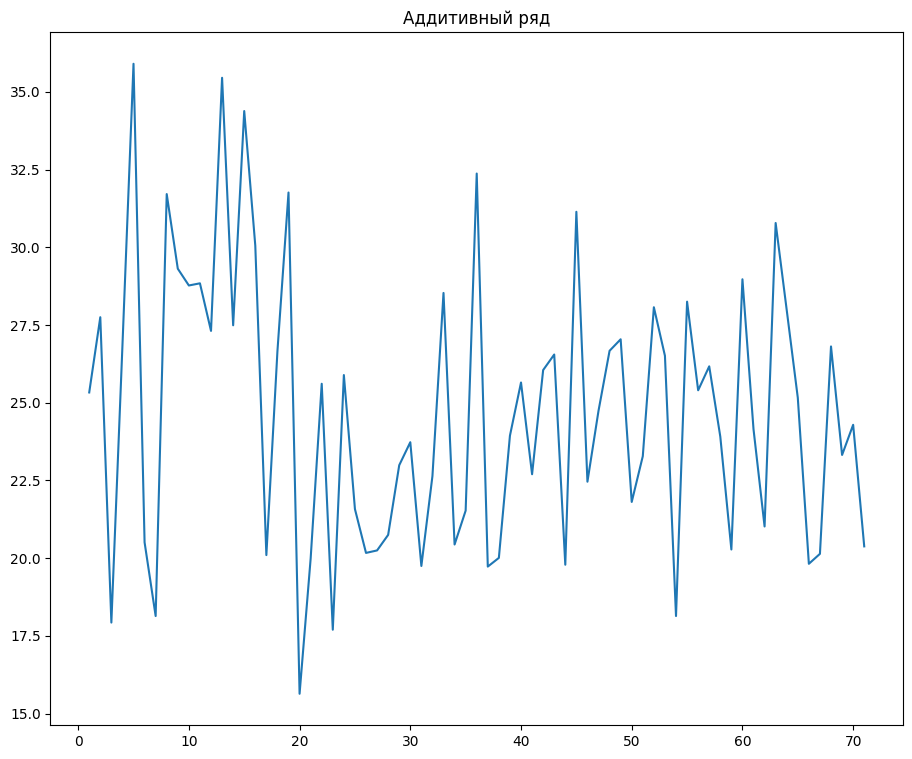

In [73]:
add = decompose_add.trend + decompose_add.seasonal + decompose_add.resid
add.plot()
plt.title('Аддитивный ряд')

Собранный мультипликативный ряд

Text(0.5, 1.0, 'Мультипликативный ряд')

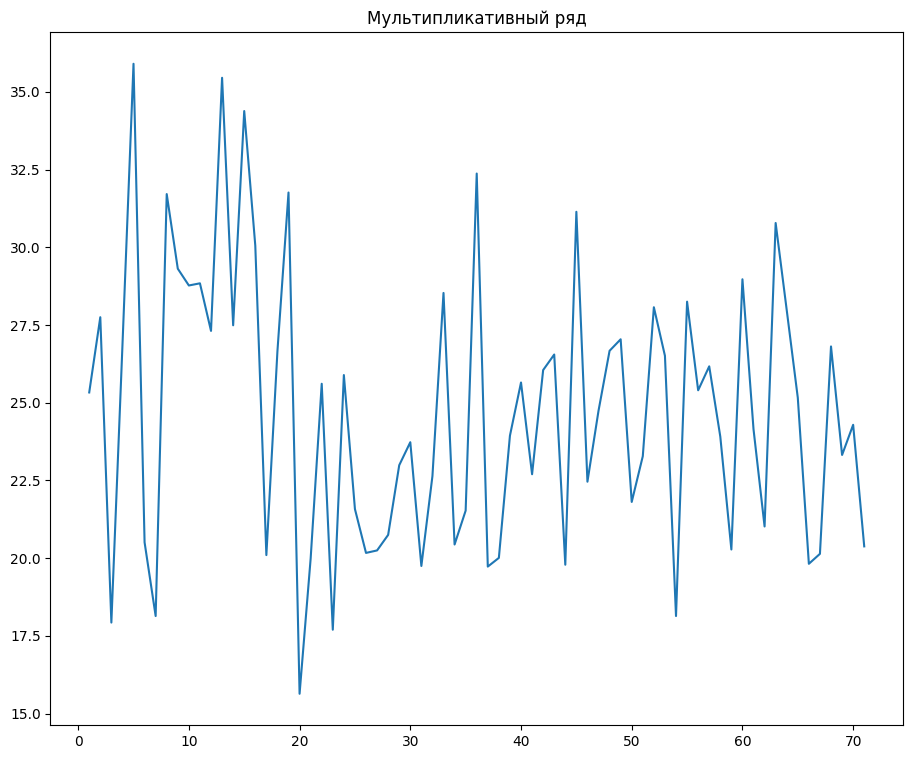

In [74]:
add = decompose_mult.trend * decompose_mult.seasonal * decompose_mult.resid
add.plot()
plt.title('Мультипликативный ряд')

In [79]:
df

0     29.90
1     25.33
2     27.75
3     17.93
4     26.83
      ...  
68    26.81
69    23.32
70    24.29
71    20.38
72    25.00
Name: x, Length: 73, dtype: float64

Автокорреляция

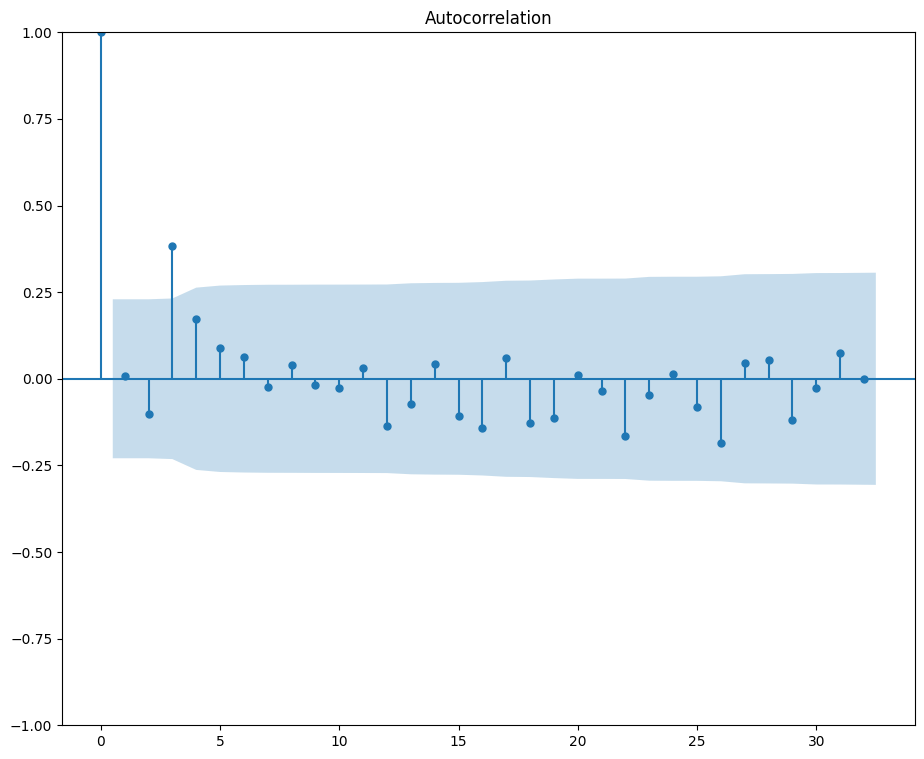

In [93]:
A = smt.graphics.plot_acf(df, lags=32)


Коррелограмма

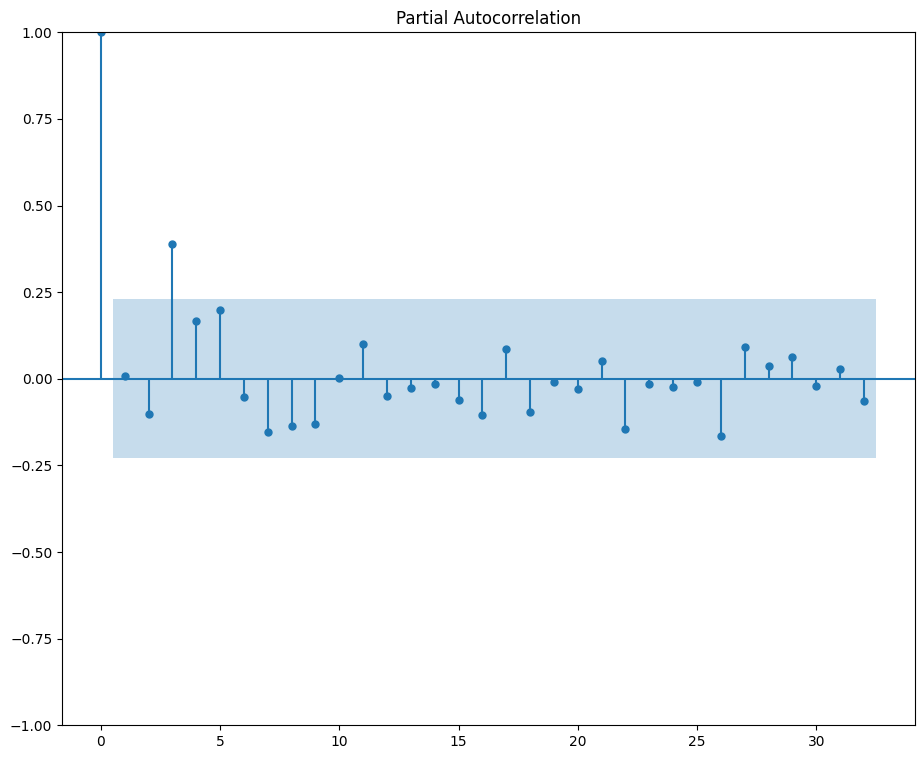

In [92]:
B = smt.graphics.plot_pacf(df, lags=32)